# **Gold Price Prediction**

**In this notebook we can see how to predict the gold price using the variables like 
Date, Open,High, Low,Close, Adj Close,Volume, SP_open,SP_high, SP_low,SP_close, SP_Ajclose,SP_volume, DJ_open,DJ_high, DJ_low,DJ_close, DJ_Ajclose,DJ_volume, EG_open,EG_high, EG_low,EG_close, EG_Ajclose,EG_volume, EU_Price,EU_open, EU_high,EU_low, EU_Trend,OF_Price, OF_Open,OF_High, OF_Low,OF_Volume, OF_Trend,OS_Price, OS_Open,OS_High, OS_Low,OS_Trend, SF_Price,SF_Open, SF_High,SF_Low, SF_Volume,SF_Trend, USB_Price,USB_Open, USB_High,USB_Low, USB_Trend,PLT_Price, PLT_Open,PLT_High, PLT_Low,PLT_Trend, PLD_Price,PLD_Open, PLD_High,PLD_Low, PLD_Trend,RHO_PRICE, USDI_Price,USDI_Open, USDI_High,USDI_Low, USDI_Volume,USDI_Trend, GDX_Open,GDX_High, GDX_Low,GDX_Close, GDX_Adj Close,GDX_Volume, USO_Open,USO_High, USO_Low,USO_Close, USO_Adj Close,USO_Volume**

# Import packages


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Import Data set

In [2]:
data=pd.read_csv("/kaggle/input/gold-price-prediction-dataset/FINAL_USO.csv")
df=pd.DataFrame(data)

# Exploratory Data Analysis

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,...,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,...,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,...,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,...,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,...,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


In [4]:
df.shape

(1718, 81)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,...,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,...,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,...,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,...,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,...,12.400000,12.470000,12.269618,4.729000e+06,7.820000,8.030000,7.670000,7.960000,7.960000,1.035100e+06
25%,116.220001,116.540001,115.739998,116.052502,116.052502,5.412925e+06,170.392498,170.962506,169.577499,170.397500,...,20.355000,20.585000,20.180950,2.259968e+07,11.420000,11.500000,11.300000,11.392500,11.392500,6.229500e+06
50%,121.915001,122.325001,121.369999,121.795002,121.795002,7.483900e+06,205.464996,206.459999,204.430000,205.529999,...,22.870001,23.054999,22.677604,3.730465e+07,16.450000,16.635001,16.040000,16.345000,16.345000,1.613015e+07
75%,128.427494,129.087498,127.840001,128.470001,128.470001,1.020795e+07,237.292500,237.722500,236.147503,236.889996,...,26.797500,27.317500,26.478154,5.697055e+07,34.419998,34.667499,34.110000,34.417499,34.417499,2.672375e+07
max,173.199997,174.070007,172.919998,173.610001,173.610001,9.380420e+07,293.089996,293.940002,291.809998,293.579987,...,56.770000,57.470001,54.617039,2.321536e+08,41.599998,42.299999,41.299999,42.009998,42.009998,1.102657e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [7]:
df.nunique()

Date             1718
Open             1363
High             1368
Low              1356
Close            1384
                 ... 
USO_High         1102
USO_Low          1124
USO_Close        1128
USO_Adj Close    1128
USO_Volume       1716
Length: 81, dtype: int64

In [8]:
X = data.drop(['Date', 'Close'], axis=1)  # Remove 'Date' and 'Close' columns
y = data['Close']

# Analysis by  Charts

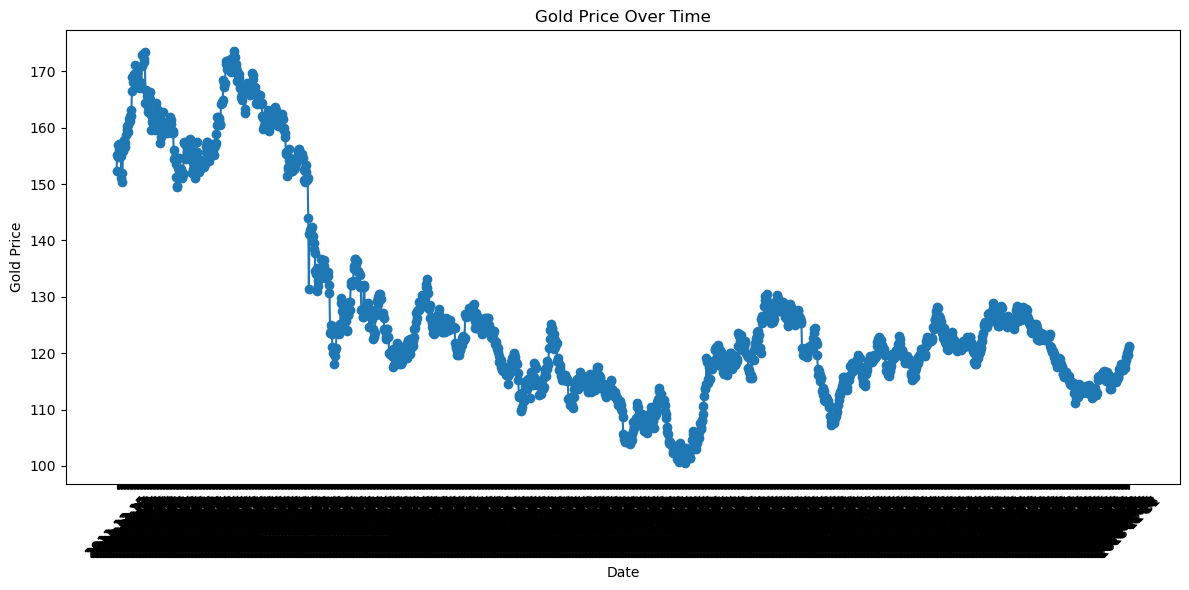

In [9]:
# Line Chart - Gold Price over Time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], marker='o')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

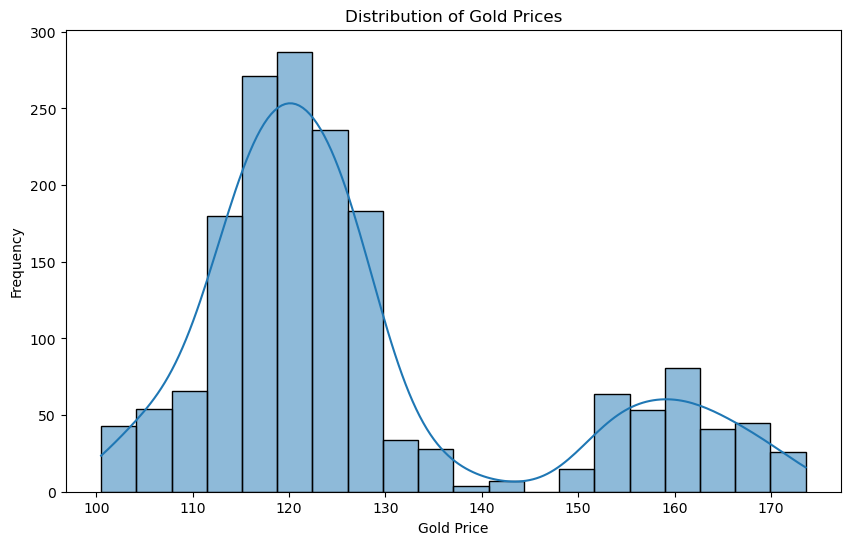

In [10]:
# Histogram - Distribution of Gold Prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Close'], bins=20, kde=True)
plt.xlabel('Gold Price')
plt.ylabel('Frequency')
plt.title('Distribution of Gold Prices')
plt.show()

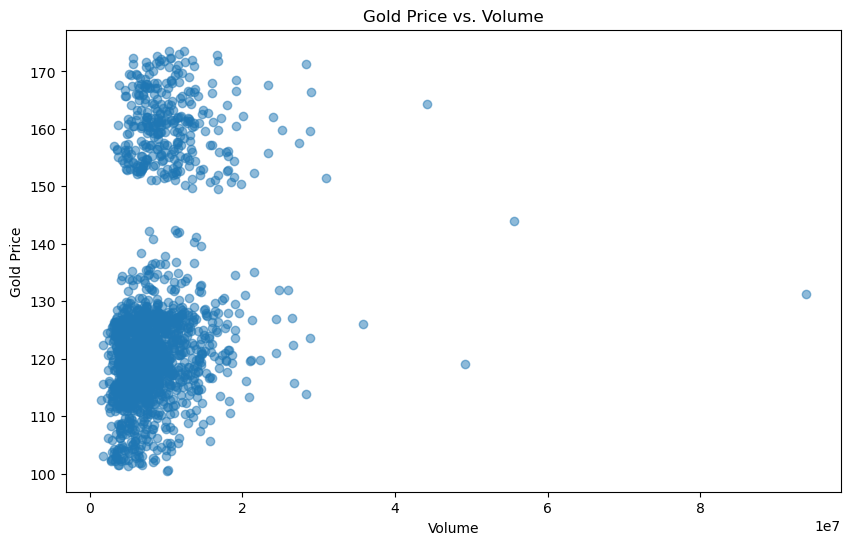

In [11]:
# Scatter Plot - Gold Price vs. Volume
plt.figure(figsize=(10, 6))
plt.scatter(data['Volume'], data['Close'], alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Gold Price')
plt.title('Gold Price vs. Volume')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


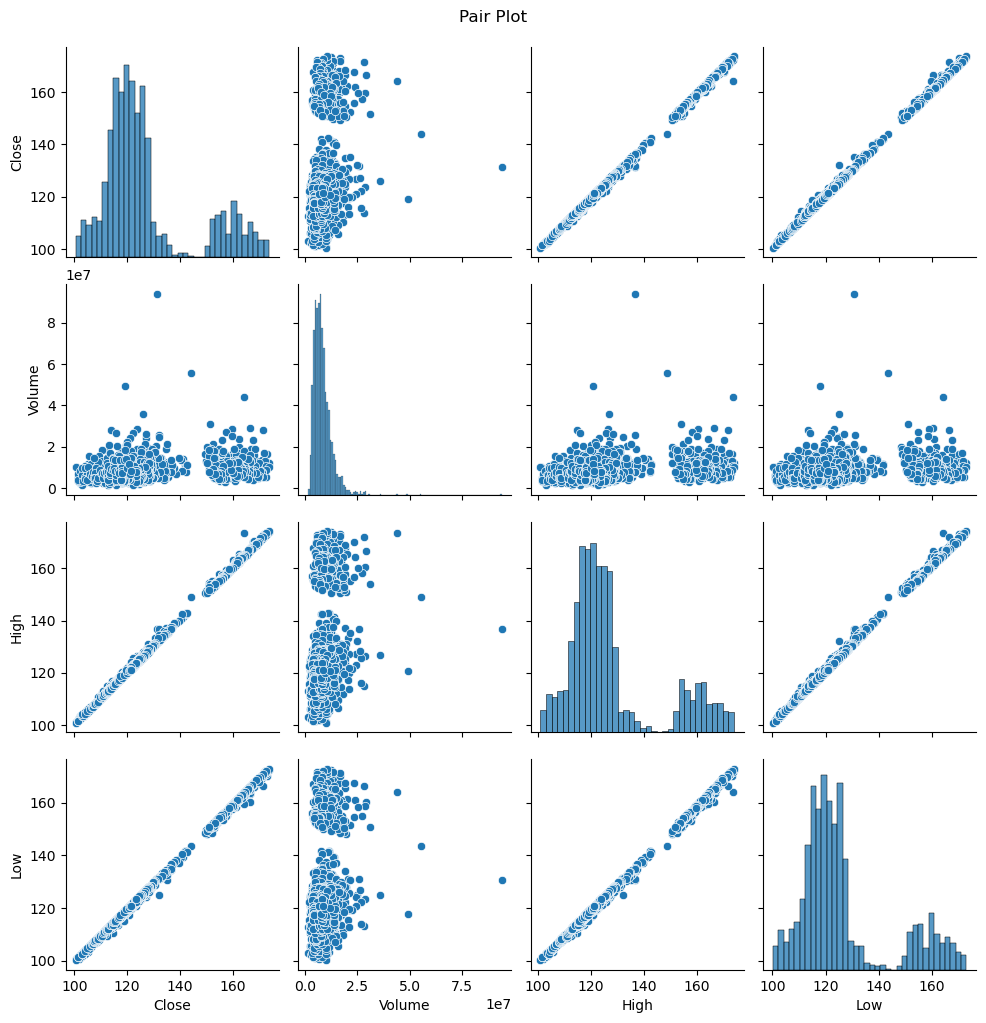

In [12]:
# Pair Plot
sns.pairplot(data[['Close', 'Volume', 'High', 'Low']])
plt.suptitle('Pair Plot', y=1.02)
plt.show()

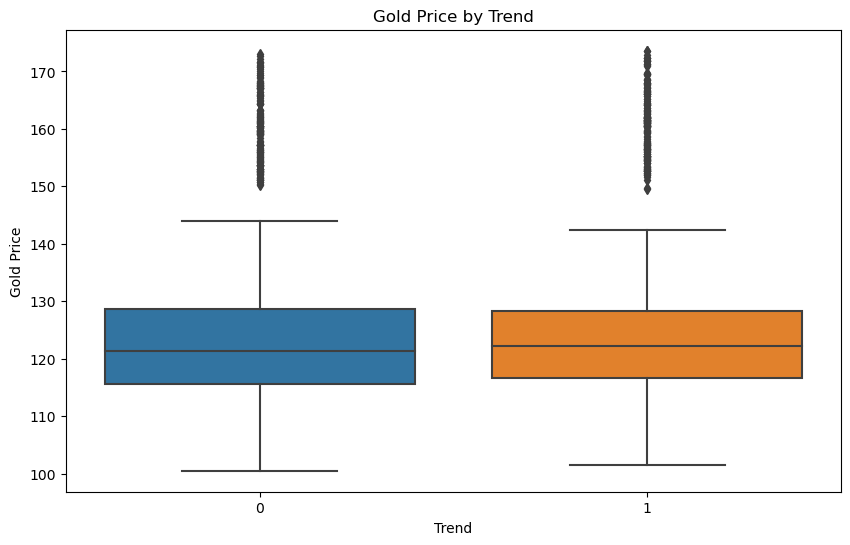

In [13]:
# Box Plot - Gold Price by Trend
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['PLD_Trend'], y=data['Close'])
plt.xlabel('Trend')
plt.ylabel('Gold Price')
plt.title('Gold Price by Trend')
plt.show()

# Correlation between the variales

In [14]:
# Select only the numeric columns for correlation calculation
numeric_columns = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# HeatMap

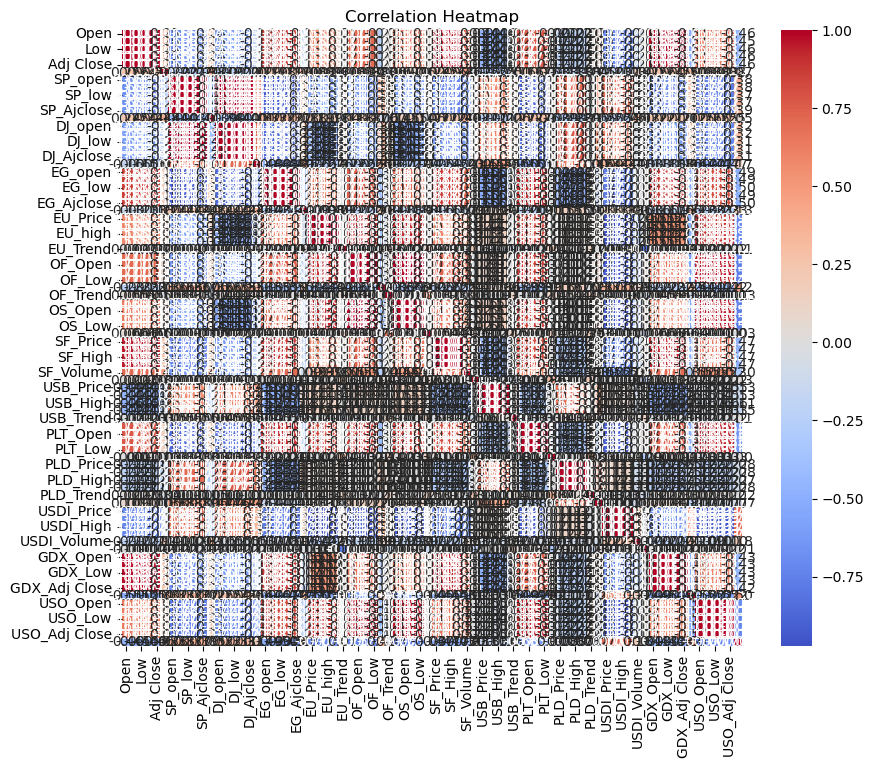

In [15]:
# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0)
plt.title('Correlation Heatmap')
plt.show()

# Split the data into training and testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define Preprocessing Step

In [17]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA for dimensionality reduction
n_components = 30  # Choose an appropriate number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Creating and Training Model

In [18]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=0, n_jobs=-1), param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)
best_model = grid_search.best_estimator_


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Make predictions on the test data

In [19]:
y_pred = best_model.predict(X_test_pca)

In [20]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.956613975836765


# Plot the actual vs. predicted values

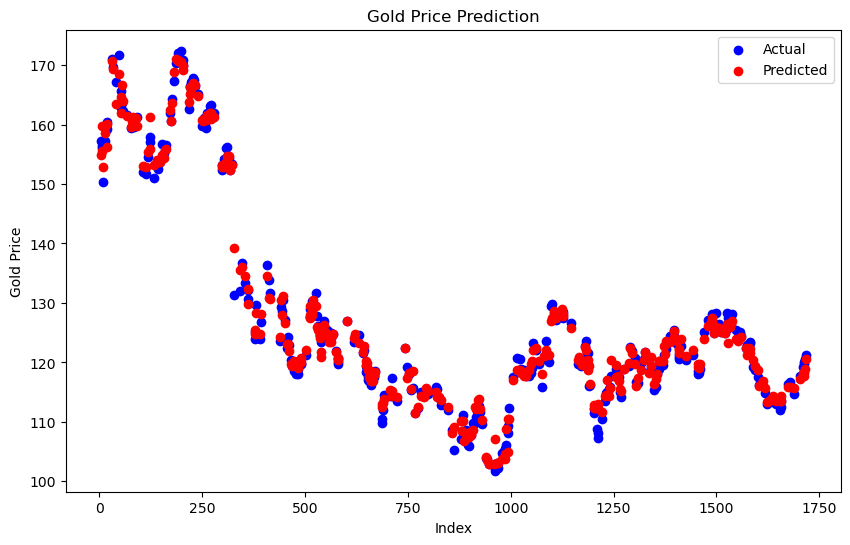

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, color='blue', label='Actual')
plt.scatter(y_test.index, y_pred, color='red', label='Predicted')
plt.xlabel('Index')
plt.ylabel('Gold Price')
plt.title('Gold Price Prediction')
plt.legend()
plt.show()